In [2]:
import pandas as pd
import zipfile


In [3]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other


In [4]:
with zipfile.ZipFile("usa-real-estate-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("real_estate_data")
    print("Extracted files:", zip_ref.namelist())


Extracted files: ['realtor-data.zip.csv']


In [5]:
df = pd.read_csv("real_estate_data/realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [7]:
df.shape

(2226382, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [9]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [10]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [11]:
df.drop(columns=["brokered_by","zip_code","prev_sold_date"], inplace=True)

In [12]:
df.shape

(2226382, 9)

In [13]:
df.isna().sum()

status             0
price           1541
bed           481317
bath          511771
acre_lot      325589
street         10866
city            1407
state              8
house_size    568484
dtype: int64

In [14]:
df.isna().sum().sum()

1900983

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum().sum()

0

In [17]:
df.duplicated().sum()

535

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(1355862, 9)

In [21]:
df.head()

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0


In [22]:
df["status"].value_counts()

status
for_sale    747459
sold        608403
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

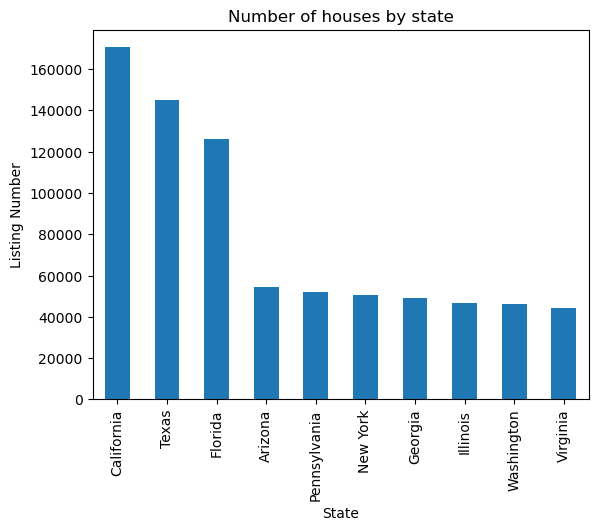

In [24]:
df["state"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Number of houses by state")
plt.ylabel("Listing Number")
plt.xlabel("State")
plt.show

In [25]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [26]:
df.groupby("state")["price"].mean().sort_values(ascending=False).astype(int)

state
Virgin Islands          1947522
Hawaii                  1491548
District of Columbia    1209649
California              1107572
Colorado                 952486
Utah                     914531
Montana                  862815
Connecticut              790488
Massachusetts            754230
Nevada                   751439
Washington               727478
Wyoming                  719581
Guam                     717504
Idaho                    689815
New York                 657557
Florida                  649977
Oregon                   645160
New Hampshire            640991
Puerto Rico              632210
Vermont                  557932
Arizona                  552891
Virginia                 546274
Alaska                   541288
New Jersey               541131
Maine                    517891
Rhode Island             511094
Maryland                 502889
South Carolina           485025
Tennessee                485018
Texas                    450757
South Dakota             440008
No

In [27]:
df.groupby("city")["price"].mean().sort_values(ascending=False).astype(int)

city
International      2147483600
Bolingbroke          45250000
Bal Harbour          26585714
Gulf Stream          21461250
Woody Creek          20987500
                      ...    
Otter Rock              10033
Midwest                 10000
Center Junction          8500
Rowan                    7500
Pilot Mound              6500
Name: price, Length: 17114, dtype: int32

In [28]:
df.groupby(["state","city"])["price"].mean().reset_index()

,state,city,price
0,Alabama,Abbeville,2.201540e+05
1,Alabama,Adamsville,1.384411e+05
2,Alabama,Addison,1.459500e+05
3,Alabama,Adger,1.743727e+05
4,Alabama,Akron,4.389400e+05
...,...,...,...
26255,Wyoming,Wheatland,2.815783e+05
26256,Wyoming,Wilson,5.719900e+06
26257,Wyoming,Worland,2.889077e+05
26258,Wyoming,Wright,2.911600e+05


In [29]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [30]:
df.select_dtypes(include=['number']).corr()["price"]

price         1.000000
bed           0.117585
bath          0.208868
acre_lot      0.005304
street        0.000481
house_size    0.073849
Name: price, dtype: float64

In [31]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [32]:
X = df[["bed","bath","house_size","acre_lot"]]

In [33]:
Y = df["price"]

In [34]:
X

,bed,bath,house_size,acre_lot
0,3.0,2.0,920.0,0.12
1,4.0,2.0,1527.0,0.08
2,2.0,1.0,748.0,0.15
3,4.0,2.0,1800.0,0.10
5,4.0,3.0,2520.0,0.46
...,...,...,...,...
2226377,4.0,2.0,3600.0,0.33
2226378,3.0,2.0,1616.0,0.10
2226379,6.0,3.0,3200.0,0.50
2226380,2.0,1.0,933.0,0.09


In [35]:
Y

0          105000.0
1           80000.0
2           67000.0
3          145000.0
5          179000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 1355862, dtype: float64

In [36]:
X.columns

Index(['bed', 'bath', 'house_size', 'acre_lot'], dtype='object')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [39]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1084689, 4), (271173, 4), (1084689,), (271173,))

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[-2.70041444e-01,  3.43516219e-01, -2.46511766e-01,
        -1.47771061e-02],
       [ 1.13135935e+00,  3.43516219e-01,  7.54859877e-02,
        -1.57069995e-02],
       [-2.70041444e-01,  3.43516219e-01, -6.61930240e-02,
        -1.59027666e-02],
       ...,
       [ 1.83205975e+00,  4.83552354e+00,  1.88347181e+00,
        -1.46058099e-02],
       [-2.70041444e-01, -4.05151668e-01, -4.82404031e-03,
        -1.56702932e-02],
       [-2.70041444e-01, -4.05151668e-01, -2.80583880e-02,
        -1.44712200e-02]])

In [44]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [45]:
X_test = scaler.fit_transform(X_test)

In [46]:
X_test

array([[ 0.42645942, -0.37141227, -0.01198902, -0.01521278],
       [-0.96923298, -0.37141227, -0.15437708, -0.01539072],
       [-0.96923298, -0.37141227,  0.07006511, -0.01525385],
       ...,
       [-0.96923298, -0.37141227, -0.18595183, -0.01532228],
       [-0.27138678,  0.31002412, -0.18494627, -0.0145284 ],
       [ 1.12430562,  0.31002412,  0.04794268, -0.01532228]])

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, Y_train)

LinearRegression()

In [50]:
predecitions = lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(Y_test, predecitions)

345119.4546278913

In [53]:
df["price"].describe().astype(int)

count       1355862
mean         574225
std         2212087
min               0
25%          239000
50%          379000
75%          600000
max      2147483600
Name: price, dtype: int32

In [54]:
joblib.dump(lr, "model.pkl")
import joblib